# **Background**

**This report is being done as final assignment in Cousera Google Data Analytics Course.**

**This report are being done on R runtime**

As a data analyst working in the marketing team at Cyclistic (a bike-sharing company active in Chicago), I was tasked with understanding how casual riders and annual members use Cyclistic bikes differently.

Those who buy one-way or full-day passes are called *casual riders. Those who purchase annual memberships are called annual members*.

Cyclistic's financial analysts have concluded that annual members are much more profitable than casual riders.

The marketing director thinks that maximizing the number of annual members would be the key to future growth rather than creating a marketing campaign targeting new casual riders. The marketing director believed that there was an opportunity to convert casual members into annual members.

## **Data Source**

The data used in this analysis is extracted from [here](https://divvy-tripdata.s3.amazonaws.com/index.html). This data is provided by Divvy under the following [license](https://www.divvybikes.com/data-license-agreement).

Notes: Cyclistic is a fictitious company and data from Divvy is used for the purpose of this case study.

The data is available as a repository collected over time. Each data point represents a bicycle trip from one docking station to the next.

The data is from 12-month period of September 01, 2021 to August 30, 2022.

# **Data Proccessing**
### Google Drive Mount

In [1]:
install.packages("googledrive") 
install.packages("httpuv") 
library("googledrive") 
library("httpuv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘promises’, ‘later’




In [2]:
install.packages("R.utils")
library("R.utils")
library("httr")
my_check <- function() {return(TRUE)}
reassignInPackage("is_interactive", pkgName = "httr", my_check)
options(rlang_interactive=TRUE)         

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AfgeXvuFyHoHlO4OAZ7N8fkUlXLZxJJmfMfJaHl8V-JBWDojtaownFT_pq0


##**Import Library**

In [4]:
library(tidyverse)
library(data.table)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks R.utils::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




## **Import Dataset**

In [5]:
list_file <- c("202110-divvy-tripdata.csv",
               "202111-divvy-tripdata.csv",
               "202112-divvy-tripdata.csv",
               "202201-divvy-tripdata.csv",
               "202202-divvy-tripdata.csv",
               "202203-divvy-tripdata.csv",
               "202204-divvy-tripdata.csv",
               "202205-divvy-tripdata.csv",
               "202206-divvy-tripdata.csv",
               "202207-divvy-tripdata.csv",
               "202208-divvy-tripdata.csv",
               "202109-divvy-tripdata.csv")

for (i in list_file){
  x <- drive_get(paste0("~/Digtalent/Capstone/Data/Raw/",i))
  if (file.exists(paste0("/content/",i))){
    next
  }
  drive_download(x)
}

z <- read_csv("/content/202110-divvy-tripdata.csv")





✔ The input `path` resolved to exactly 1 file.

File downloaded:

• 202110-divvy-tripdata.csv <id: 1ABlr9Xz9p8CkmU4f04lcq8JfuhxdFyAf>

Saved locally as:

• 202110-divvy-tripdata.csv





✔ The input `path` resolved to exactly 1 file.

File downloaded:

• 202111-divvy-tripdata.csv <id: 1gNosNORyMZngZPuuNyuuOZ-b8DhJE_Ph>

Saved locally as:

• 202111-divvy-tripdata.csv





✔ The input `path` resolved to exactly 1 file.

File downloaded:

• 202112-divvy-tripdata.csv <id: 1mkFZeeGi-5XzVH7mmHNTlNtgjQCef_hu>

Saved locally as:

• 202112-divvy-tripdata.csv





✔ The input `path` resolved to exactly 1 file.

File downloaded:

• 202201-divvy-tripdata.csv <id: 1uCBQ-1ok79H0GslpmWTxtda77fW3kQAs>

Saved locally as:

• 202201-divvy-tripdata.csv





✔ The input `path` resolved to exactly 1 file.

File downloaded:

• 202202-divvy-tripdata.csv <id: 1fSxfvkgiZlrOWMnAux0hDqOUGjgXpKHp>

Saved locally as:

• 202202-divvy-tripdata.csv





✔ The input `path` resolved to exactly 1 file.

File download

## Checking column name consistency 

In [6]:
list_file <- list.files(path="/content/")
list_file <- list_file[!list_file=="sample_data"]
col_names <- NULL
for (i in list_file){
    name <- fread(paste0("/content/",i)) %>% colnames()
    col_names <- rbind(col_names,name)
}
# nrow() unique
check <- col_names %>% as.data.frame() %>%
    duplicated() %>%
    sum()
if (check==11){
    paste0("All column have the same name.")
} else {
    paste0("There is column(s) with different name.")
}

[1] "All column have the same name."

## Import and merge dataset

In [7]:
list_file <- list.files(path="/content/")
list_file <- list_file[!list_file=="sample_data"]
divvy <- NULL
for (i in list_file){
    data <- fread(paste0("/content/",i), na.strings = c("",NA))
    divvy <- rbind(divvy,data)
}
print("Import completed.")

[1] "Import completed."


In [8]:
head(divvy)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NA,NA,NA,NA,41.89,-87.68,41.89,-87.67,casual
F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NA,NA,NA,NA,41.94,-87.64,41.98,-87.67,casual
6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NA,NA,NA,NA,41.81,-87.72,41.80,-87.72,casual
78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NA,NA,NA,NA,41.80,-87.72,41.81,-87.72,casual
E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NA,NA,NA,NA,41.88,-87.74,41.88,-87.71,casual
346DE323A2677DC0,electric_bike,2021-09-28 01:53:18,2021-09-28 02:00:02,NA,NA,NA,NA,41.87,-87.75,41.88,-87.74,casual


## Checking missing value, data type, unique value, and data summary

In [9]:
# Define check_missing_value function
check_missing_value <- function(my_table){
    col_names <- my_table %>% summarise(across(everything(), ~ sum(is.na(.)))) %>% colnames()
    missing_value <- my_table %>% summarise(across(everything(), ~ sum(is.na(.)))) 
    value <- NULL
    for (i in 1:length(col_names)){
        value <- append(value, missing_value[,i])
    }
    data.frame("column_name" = col_names,
               "missing_value"=value,
               "missing_rate_percent"=round((value/nrow(my_table))*100,2)
               )
}

check_missing_value(divvy)

column_name,missing_value,missing_rate_percent
<chr>,<int>,<dbl>
ride_id,0,0.00
rideable_type,0,0.00
started_at,0,0.00
ended_at,0,0.00
start_station_name,884365,15.03
start_station_id,884363,15.03
end_station_name,946303,16.09
end_station_id,946303,16.09
start_lat,0,0.00


15% of starting stations, 16% of end stations, and 10% of end locations are missing.

## Checking consistency of ride period


In [10]:
length_trip_s <- difftime(divvy[,ended_at],divvy[,started_at])
divvy[,length_trip_s:=length_trip_s]
divvy[length_trip_s<=0,list(length_trip_s)] %>% head()
inconsistent_rows <- divvy[length_trip_s<=0,list(length_trip_s)] %>% nrow()
paste0("There is inconstistency in ride length (0 or negative length).")
paste0("The numbers of inconsistencies: ",inconsistent_rows)

divvy <- divvy[length_trip_s>0]
paste0("Inconsistences data have been removed")

length_trip_s
<drtn>
-11 secs
0 secs
0 secs
0 secs
0 secs
0 secs


[1] "There is inconstistency in ride length (0 or negative length)."

[1] "The numbers of inconsistencies: 606"

[1] "Inconsistences data have been removed"

## Checking consistency of station names

In [11]:
start_station <- divvy[,c("start_station_id","start_station_name")]
colnames(start_station) <- c("station_id","station_name")
end_station <- divvy[,c("end_station_id","end_station_name")]
colnames(end_station) <- c("station_id","station_name")
station <- rbindlist(list(start_station, end_station)) %>% unique()
station[,total_station_name:=c(.N),by="station_id"]
station[,total_station_id:=c(.N),by="station_name"]
station_id_count <- station[,c("station_id","total_station_name")]
station_name_count <- station[,c("station_name","total_station_id")]

station_id_count[total_station_name>1] %>% head()
station_name_count[total_station_id>1] %>% head()

inconsistent_station_id <- station_id_count[total_station_name>1] %>% nrow()
inconsistent_station_name <- station_name_count[total_station_id>1] %>% nrow()
paste0("There are ",inconsistent_station_id," stations that has multiple names.")
paste0("There are ",inconsistent_station_name," station_name that has multipe ids.")

station_id,total_station_name
<chr>,<int>
604,2
632,2
643,2
661,2
546,3
624,2


station_name,total_station_id
<chr>,<int>
NA,3
Lake Park Ave & 47th St,2
California Ave & Cortez St,2
Calumet Ave & 51st St,2
Christiana Ave & Lawrence Ave,2
Lakefront Trail & Bryn Mawr Ave,2


[1] "There are 361 stations that has multiple names."

[1] "There are 41 station_name that has multipe ids."

### Using station information to try fixing consistencies
Data from internal [Divvy dataset](https://gbfs.divvybikes.com/gbfs/en/station_information.json)

In [12]:
library(jsonlite)

data <- fromJSON("https://gbfs.divvybikes.com/gbfs/en/station_information.json")

station <- data.table(
  station_id=data[["data"]][["stations"]][["station_id"]],
  name=data[["data"]][["stations"]][["name"]],
  lat=data[["data"]][["stations"]][["lat"]],
  lon=data[["data"]][["stations"]][["lon"]],
  short_name=data[["data"]][["stations"]][["short_name"]],
  capacity=data[["data"]][["stations"]][["capacity"]]
)
station %>% head()


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten


The following object is masked from ‘package:R.utils’:

    validate




station_id,name,lat,lon,short_name,capacity
<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
a3acb1de-a135-11e9-9cda-0a87ae2ba916,California Ave & Lake St,41.88445,-87.69630,15666,11
a3ad2d57-a135-11e9-9cda-0a87ae2ba916,State St & Pershing Rd,41.82302,-87.62657,15449,11
a3b23cb8-a135-11e9-9cda-0a87ae2ba916,Racine Ave & 65th St,41.77539,-87.65431,564,11
a3acdae2-a135-11e9-9cda-0a87ae2ba916,Wentworth Ave & 63rd St,41.78008,-87.62975,KA1503000025,11
a3addda0-a135-11e9-9cda-0a87ae2ba916,Kedzie Ave & 24th St,41.84819,-87.70541,KA1504000086,11
a3b20960-a135-11e9-9cda-0a87ae2ba916,Damen Ave & 51st St,41.80091,-87.67468,554,7


In [13]:
# covert latitude and longitude to 5 digit decimal
divvy[,start_lat:=(divvy[,start_lat] %>% round(5))]
divvy[,start_lng:=(divvy[,start_lng] %>% round(5))]
divvy[,end_lat:=(divvy[,end_lat] %>% round(5))]
divvy[,end_lng:=(divvy[,end_lng] %>% round(5))]

In [14]:
# Left Join divvy with station to get more detail station_name
divvy <- merge(divvy, station[!is.na(short_name)], by.x="start_station_id", by.y="short_name", all.x=TRUE)
divvy[,start_station_name:=fcoalesce(divvy[,name],divvy[,start_station_name])]
divvy <- divvy[,-c("station_id","name","lat","lon","capacity")]
divvy <- merge(divvy, station[!is.na(short_name)], by.x="end_station_id", by.y="short_name", all.x=TRUE)
divvy[,end_station_name:=fcoalesce(divvy[,name],divvy[,end_station_name])]
divvy <- divvy[,-c("station_id","name","lat","lon","capacity")]
divvy <- merge(divvy, station, by.x=c("start_lat","start_lng"), by.y=c("lat","lon"), all.x=TRUE)
divvy[,start_station_name:=fcoalesce(divvy[,start_station_name],divvy[,name])]
divvy[,start_station_id:=fcoalesce(divvy[,start_station_id],divvy[,short_name])]
divvy <- divvy[,-c("station_id","name","short_name","capacity")]
divvy <- merge(divvy, station, by.x=c("end_lat","end_lng"), by.y=c("lat","lon"), all.x=TRUE)
divvy[,end_station_name:=fcoalesce(divvy[,end_station_name],divvy[,name])]
divvy[,end_station_id:=fcoalesce(divvy[,end_station_id],divvy[,short_name])]
divvy <- divvy[,-c("station_id","name","short_name","capacity")]
head(divvy)

end_lat,end_lng,start_lat,start_lng,end_station_id,start_station_id,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,length_trip_s
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<drtn>
NA,NA,41.65187,-87.53967,NA,20214,AFF9DEB0BC836CC9,docked_bike,2022-06-04 07:26:15,2022-06-05 08:26:16,Avenue O & 134th St,NA,casual,90001 secs
NA,NA,41.65667,-87.59880,NA,20212,A72DD0003D4C1D33,classic_bike,2021-10-21 15:12:06,2021-10-22 16:12:02,Altgeld Gardens,NA,casual,89996 secs
NA,NA,41.65667,-87.59880,NA,20212,7A93DC0729A8F704,classic_bike,2021-10-26 05:56:26,2021-10-27 06:56:21,Altgeld Gardens,NA,casual,89995 secs
NA,NA,41.65667,-87.59880,NA,20212,6B7477B18D4A172F,classic_bike,2022-04-29 19:43:41,2022-04-30 20:43:37,Altgeld Gardens,NA,casual,89996 secs
NA,NA,41.65667,-87.59880,NA,20212,0AB7142E6453CBEE,classic_bike,2022-05-30 20:47:38,2022-05-31 21:47:33,Altgeld Gardens,NA,casual,89995 secs
NA,NA,41.65667,-87.59880,NA,20212,07D8AE83EF96DC1F,classic_bike,2022-05-30 22:12:11,2022-05-31 23:12:06,Altgeld Gardens,NA,casual,89995 secs


In [15]:
check_missing_value(divvy)

column_name,missing_value,missing_rate_percent
<chr>,<int>,<dbl>
end_lat,5727,0.10
end_lng,5727,0.10
start_lat,0,0.00
start_lng,0,0.00
end_station_id,946004,16.08
start_station_id,884331,15.03
ride_id,0,0.00
rideable_type,0,0.00
started_at,0,0.00


The are still around 15% of inaccurate data points. This will one of the downside of this analysis.

# **Analysis**

In [16]:
library("lubridate")
# create day_of_week column
divvy[,day_of_week:=started_at %>% lubridate::wday(,week_start = getOption("lubridate.week.start", 1)) %>%
     factor(levels = 1:7,
            labels = c("Mon", "Tue", "Wed", "Thr", "Fri", "Sat", "Sun"))] 
divvy[,month:=started_at %>% month() %>%
     factor(levels = 1:12)]

# Change membership value
divvy[member_casual=="casual",member_casual:="Casual Members"]
divvy[member_casual=="member",member_casual:="Annual Members"]
divvy[rideable_type=="docked_bike",rideable_type:="Docked Bike"]
divvy[rideable_type=="classic_bike",rideable_type:="Classic Bike"]
divvy[rideable_type=="electric_bike",rideable_type:="Electric Bike"]

# add hour started_at column
divvy[,hour:=hour(started_at) %>% factor(level=0:23)]

# Calculate distance from latitude and longitude
if (!require(geosphere)) install.packages("geosphere")
library(geosphere)
divvy[,distance:=distHaversine(divvy[,c("start_lat","start_lng")],
                               divvy[,c("end_lat","end_lng")])]

Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: geosphere

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘geosphere’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sp’




In [17]:
# Install "google" ggplot theme
devtools::install_github("ricardo-bion/ggtech", 
                          dependencies=TRUE)
library(ggtech)

# Plot size function
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

vctrs       (0.5.0 -> 0.5.1 ) [CRAN]
Rttf2pt1    (NA    -> 1.3.11) [CRAN]
extrafontdb (NA    -> 1.0   ) [CRAN]
extrafont   (NA    -> 0.18  ) [CRAN]


Installing 4 packages: vctrs, Rttf2pt1, extrafontdb, extrafont

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpsJk6gL/remotes494c64326/ricardo-bion-ggtech-4d6282f/DESCRIPTION’ ... OK
* preparing ‘ggtech’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘ggtech_0.1.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



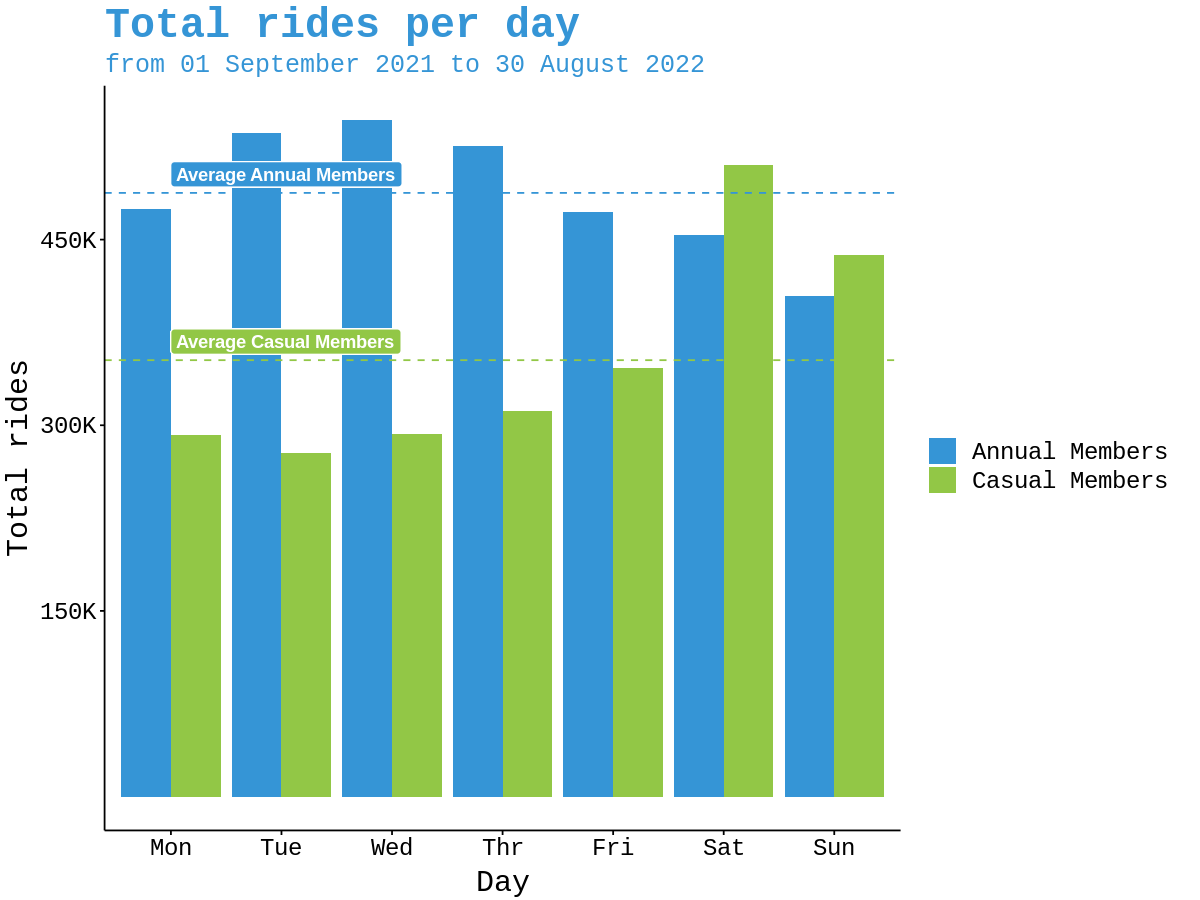

In [18]:
#Visualization
data_plot <- divvy[,c(.N),by=c("day_of_week","member_casual")]
casual_mean <- data_plot[member_casual=="Casual Members",mean(V1)]
member_mean <- data_plot[member_casual=="Annual Members",mean(V1)]

fig(10,7.5)
ggplot(data=data_plot)+
    theme_tech(theme = "google")+
    scale_fill_tech(theme="X23andme")+
    theme(plot.title = element_text(face="bold",colour="#3595d6"),
         plot.subtitle = element_text(colour="#3595d6"))+
    geom_bar(mapping=aes(x=day_of_week, y=V1, fill=member_casual), position="dodge", stat="identity")+
    geom_hline(aes(yintercept=casual_mean),colour="#92c746",linetype="dashed")+
    geom_hline(aes(yintercept=member_mean),colour="#3595d6",linetype="dashed")+
    geom_label(aes(x=1,y=casual_mean+15000, label="Average Casual Members", hjust=0), colour="white", fill="#92c746", fontface="bold")+
    geom_label(aes(x=1,y=member_mean+15000, label="Average Annual Members", hjust=0), colour="white", fill="#3595d6", fontface="bold")+
    labs(x='Day', y='Total rides', 
         title='Total rides per day',
         subtitle="from 01 September 2021 to 30 August 2022")+
    scale_y_continuous(breaks = c(150000, 300000, 450000, 600000), labels = c("150K", "300K", "450K", "600K"))

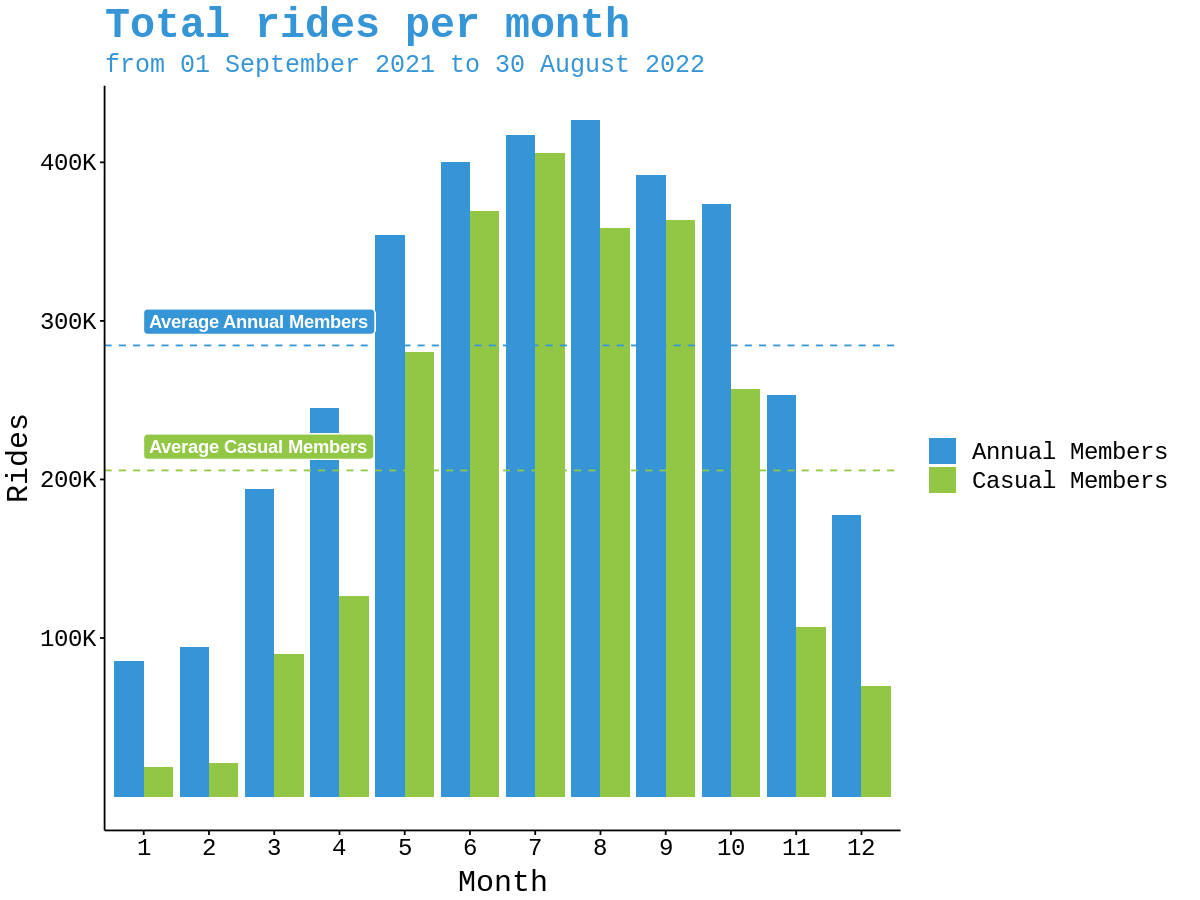

In [19]:
data_plot <- divvy[,c(.N),by=c("month","member_casual")]
casual_mean <- data_plot[member_casual=="Casual Members",mean(V1)]
member_mean <- data_plot[member_casual=="Annual Members",mean(V1)]

fig(10,7.5)
ggplot(data=data_plot)+
    theme_tech(theme = "google")+
    scale_fill_tech(theme="X23andme")+
    theme(plot.title = element_text(face="bold",colour="#3595d6"),
         plot.subtitle = element_text(colour="#3595d6"))+
    geom_bar(mapping=aes(x=month, y=V1, fill=member_casual), position="dodge", stat="identity")+
    geom_hline(aes(yintercept=casual_mean),colour="#92c746",linetype="dashed")+
    geom_hline(aes(yintercept=member_mean),colour="#3595d6",linetype="dashed")+
    geom_label(aes(x=1,y=casual_mean+15000, label="Average Casual Members", hjust=0), colour="white", fill="#92c746", fontface="bold")+
    geom_label(aes(x=1,y=member_mean+15000, label="Average Annual Members", hjust=0), colour="white", fill="#3595d6", fontface="bold")+
    labs(x='Month', y='Rides', 
         title='Total rides per month',
         subtitle="from 01 September 2021 to 30 August 2022")+
    scale_y_continuous(breaks = c(100000, 200000, 300000, 400000, 500000), labels = c("100K", "200K", "300K", "400K", "500K"))

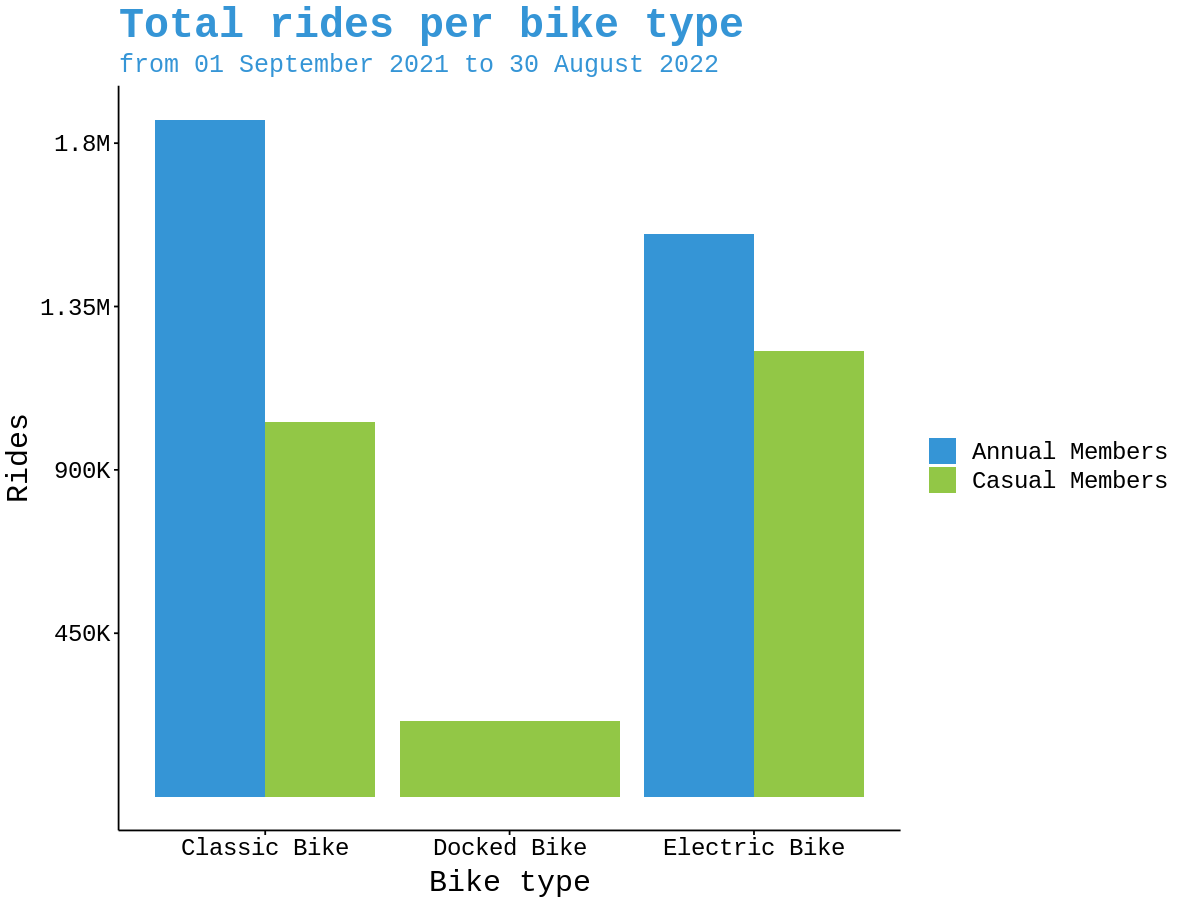

In [20]:
data_plot <- divvy[,c(.N),by=c("rideable_type","member_casual")]

fig(10,7.5)
ggplot(data=data_plot)+
    theme_tech(theme = "google")+
    scale_fill_tech(theme="X23andme")+
    theme(plot.title = element_text(face="bold",colour="#3595d6"),
         plot.subtitle = element_text(colour="#3595d6"))+
    geom_bar(mapping=aes(x=rideable_type, y=V1, fill=member_casual), position="dodge", stat="identity")+
    labs(x='Bike type', y='Rides', 
         title='Total rides per bike type',
         subtitle="from 01 September 2021 to 30 August 2022")+
    scale_y_continuous(breaks = c(450000, 900000, 1350000, 1800000), labels = c("450K", "900K", "1.35M", "1.8M"))


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


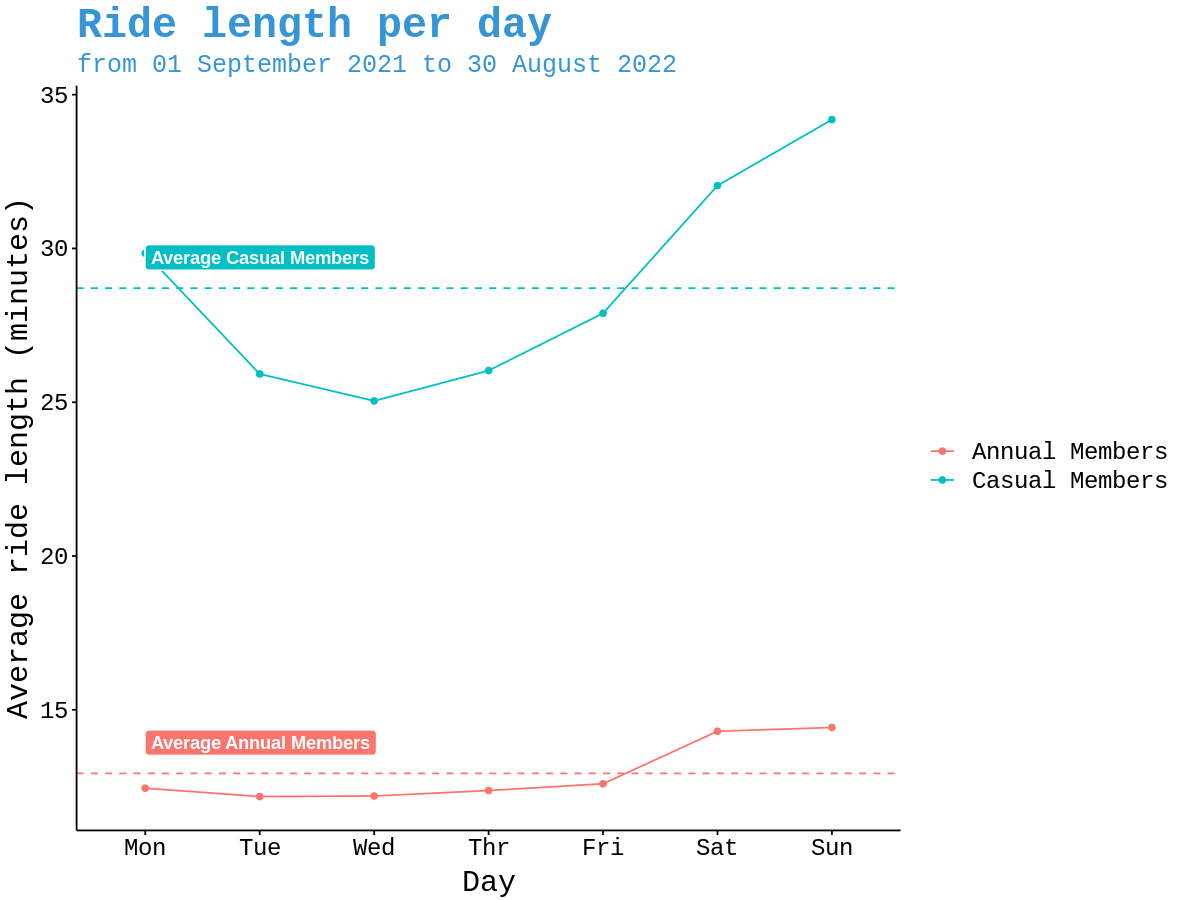

In [26]:
data_plot <- divvy[,mean(length_trip_s/60),by=c("day_of_week","member_casual")]
casual_mean <- data_plot[member_casual=="Casual Members",mean(V1)]
member_mean <- data_plot[member_casual=="Annual Members",mean(V1)]
mean_diff <- ((casual_mean %>% as.numeric)/(member_mean %>% as.numeric)) %>% round(2)

fig(10,7.5)
ggplot(data=data_plot,mapping=aes(x=day_of_week, y=V1, color=member_casual, group=member_casual))+
    theme_tech(theme = "google")+
    scale_fill_tech(theme="X23andme")+
    theme(plot.title = element_text(face="bold",colour="#3595d6"),
         plot.subtitle = element_text(colour="#3595d6"))+
    geom_line()+
    geom_point()+
    geom_hline(aes(yintercept=casual_mean),colour="#00bfc4",linetype="dashed")+
    geom_hline(aes(yintercept=member_mean),colour="#f8766d",linetype="dashed")+
    geom_label(aes(x=1,y=casual_mean+1, label="Average Casual Members", hjust=0), colour="white", fill="#00bfc4", fontface="bold")+
    geom_label(aes(x=1,y=member_mean+1, label="Average Annual Members", hjust=0), colour="white", fill="#f8766d", fontface="bold")+
    labs(x='Day', y='Average ride length (minutes)', 
         title='Ride length per day',
         subtitle="from 01 September 2021 to 30 August 2022")

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


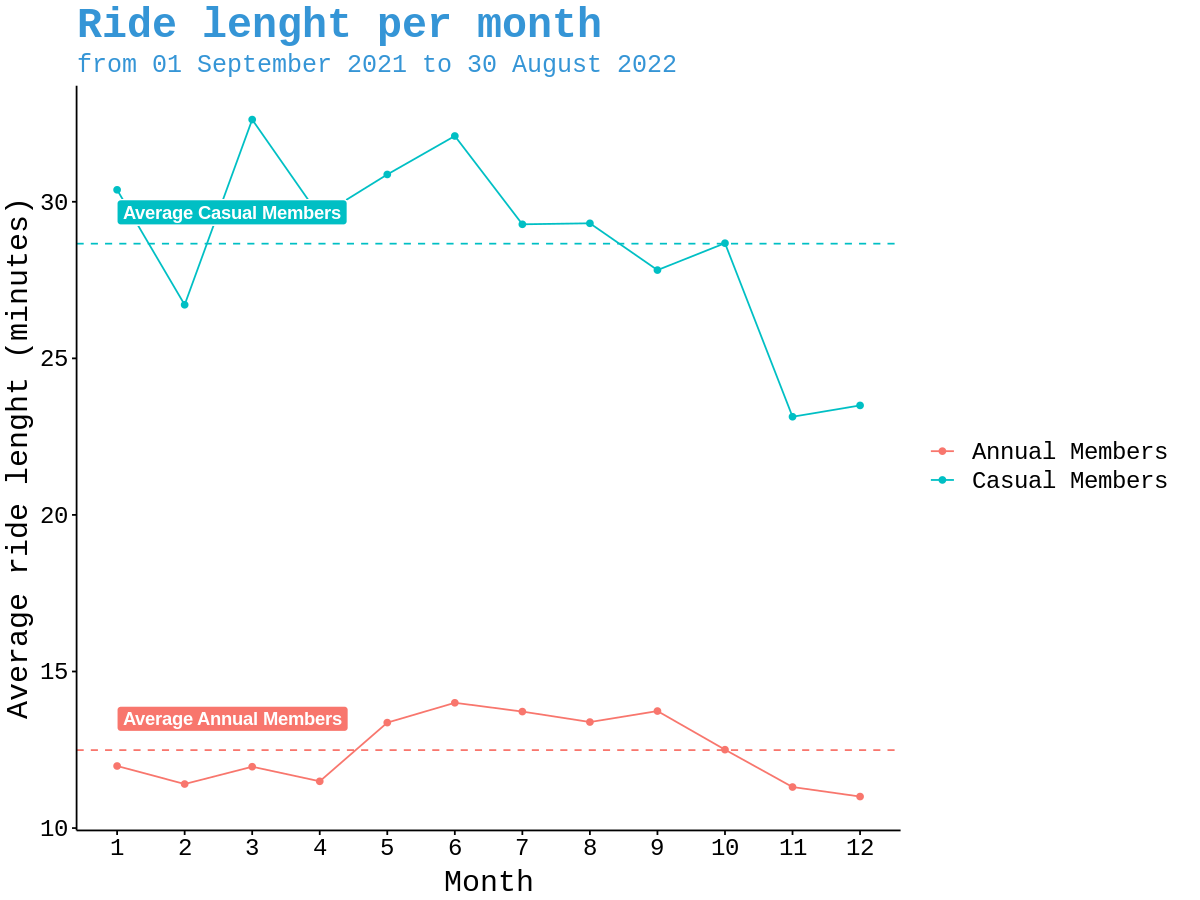

In [22]:
data_plot <- divvy[,mean(length_trip_s/60),by=c("month","member_casual")]
casual_mean <- data_plot[member_casual=="Casual Members",mean(V1)]
member_mean <- data_plot[member_casual=="Annual Members",mean(V1)]
mean_diff <- ((casual_mean %>% as.numeric)/(member_mean %>% as.numeric)) %>% round(2)

fig(10,7.5)
ggplot(data=data_plot,mapping=aes(x=month, y=V1, color=member_casual, group=member_casual))+
    theme_tech(theme = "google")+
    scale_fill_tech(theme="X23andme")+
    theme(plot.title = element_text(face="bold",colour="#3595d6"),
         plot.subtitle = element_text(colour="#3595d6"))+
    geom_line()+
    geom_point()+
    geom_hline(aes(yintercept=casual_mean),colour="#00bfc4",linetype="dashed")+
    geom_hline(aes(yintercept=member_mean),colour="#f8766d",linetype="dashed")+
    geom_label(aes(x=1,y=casual_mean+1, label="Average Casual Members", hjust=0), colour="white", fill="#00bfc4", fontface="bold")+
    geom_label(aes(x=1,y=member_mean+1, label="Average Annual Members", hjust=0), colour="white", fill="#f8766d", fontface="bold")+
    labs(x='Month', y='Average ride lenght (minutes)', 
         title='Ride lenght per month',
         subtitle="from 01 September 2021 to 30 August 2022")

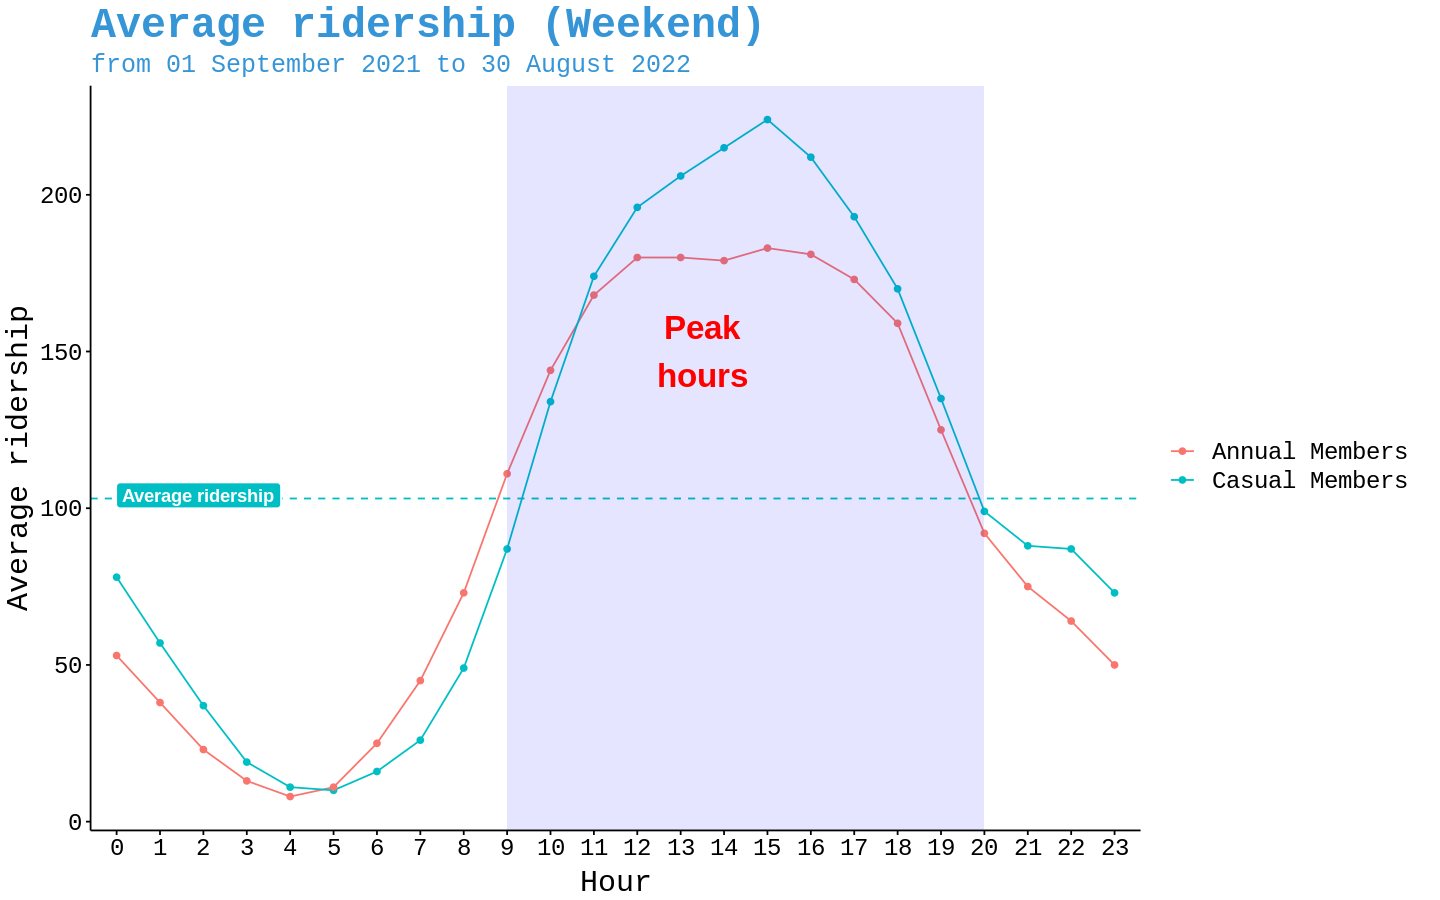

In [23]:
data_plot <- divvy[day_of_week=="Sat" | day_of_week=="Sun"][
    ,(c(.N)/365) %>% round(0),by=c("member_casual","hour")
]
mean <- data_plot[,mean(V1)]

fig(12,7.5)
ggplot(data=data_plot,mapping=aes(x=hour, y=V1, color=member_casual, group=member_casual))+
    theme_tech(theme = "google")+
    scale_fill_tech(theme="X23andme")+
    theme(plot.title = element_text(face="bold",colour="#3595d6"),
          plot.subtitle = element_text(colour="#3595d6"))+
    geom_line()+
    geom_point()+
    geom_hline(aes(yintercept=mean),colour="#00bfc4",linetype="dashed")+
    annotate("rect", xmin=10, xmax=21, ymin=-Inf, ymax=Inf, alpha=0.1, fill="blue")+
    annotate("text", x=14.5, y=150, label="Peak\nhours", size=7, fontface="bold", color="red")+
    geom_label(aes(x=1,y=mean+1, label="Average ridership", hjust=0), colour="white", fill="#00bfc4", fontface="bold")+
    labs(x='Hour', y='Average ridership', 
         title='Average ridership (Weekend)',
         subtitle="from 01 September 2021 to 30 August 2022")

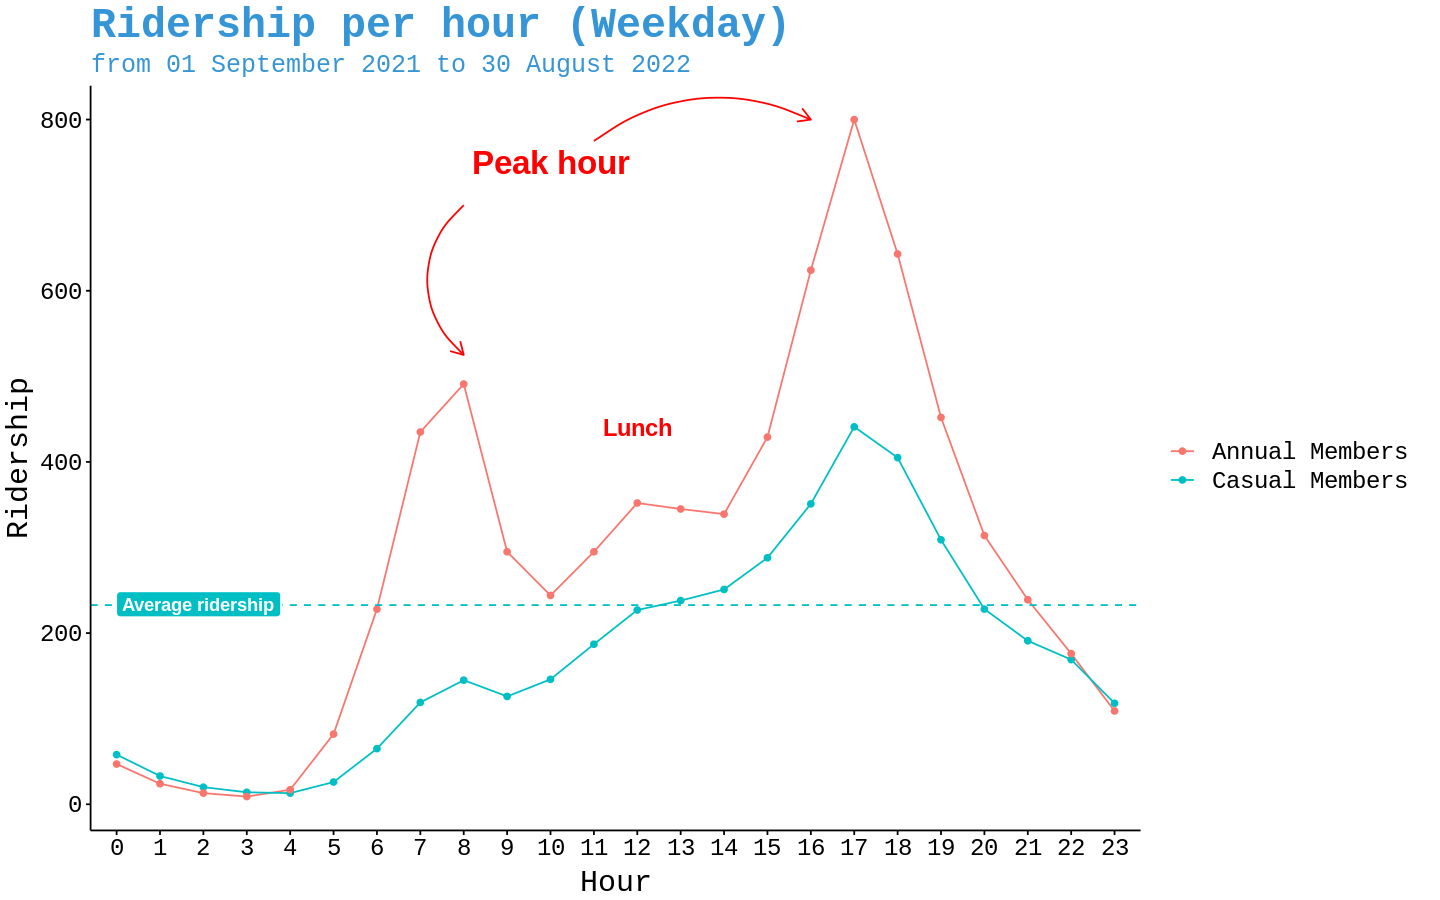

In [24]:
data_plot <- divvy[!(day_of_week=="Sat" | day_of_week=="Sun")][
    ,(c(.N)/365) %>% round(0),by=c("member_casual","hour")
]
mean <- data_plot[,mean(V1)]

fig(12,7.5)
ggplot(data=data_plot,mapping=aes(x=hour, y=V1, color=member_casual, group=member_casual))+
    theme_tech(theme = "google")+
    scale_fill_tech(theme="X23andme")+
    theme(plot.title = element_text(face="bold",colour="#3595d6"),
          plot.subtitle = element_text(colour="#3595d6"))+
    geom_line()+
    geom_point()+
    geom_hline(aes(yintercept=mean),colour="#00bfc4",linetype="dashed")+
    annotate("text", x=11, y=750, label="Peak hour", size=7, fontface="bold", color="red")+
    annotate("text", x=13, y=440, label="Lunch", size=5, fontface="bold", color="red")+
    annotate("curve",x=9, xend=9, y=700, yend=525,
            curvature=0.5, arrow=arrow(length=unit(3,"mm")), color="red")+
    annotate("curve",x=12, xend=17, y=775, yend=800,
            curvature=-0.3, arrow=arrow(length=unit(3,"mm")), color="red")+
    geom_label(aes(x=1,y=mean+1, label="Average ridership", hjust=0), colour="white", fill="#00bfc4", fontface="bold")+
    labs(x='Hour', y='Ridership', 
         title='Ridership per hour (Weekday)',
         subtitle="from 01 September 2021 to 30 August 2022")

## Busiest Stations for Casual Member

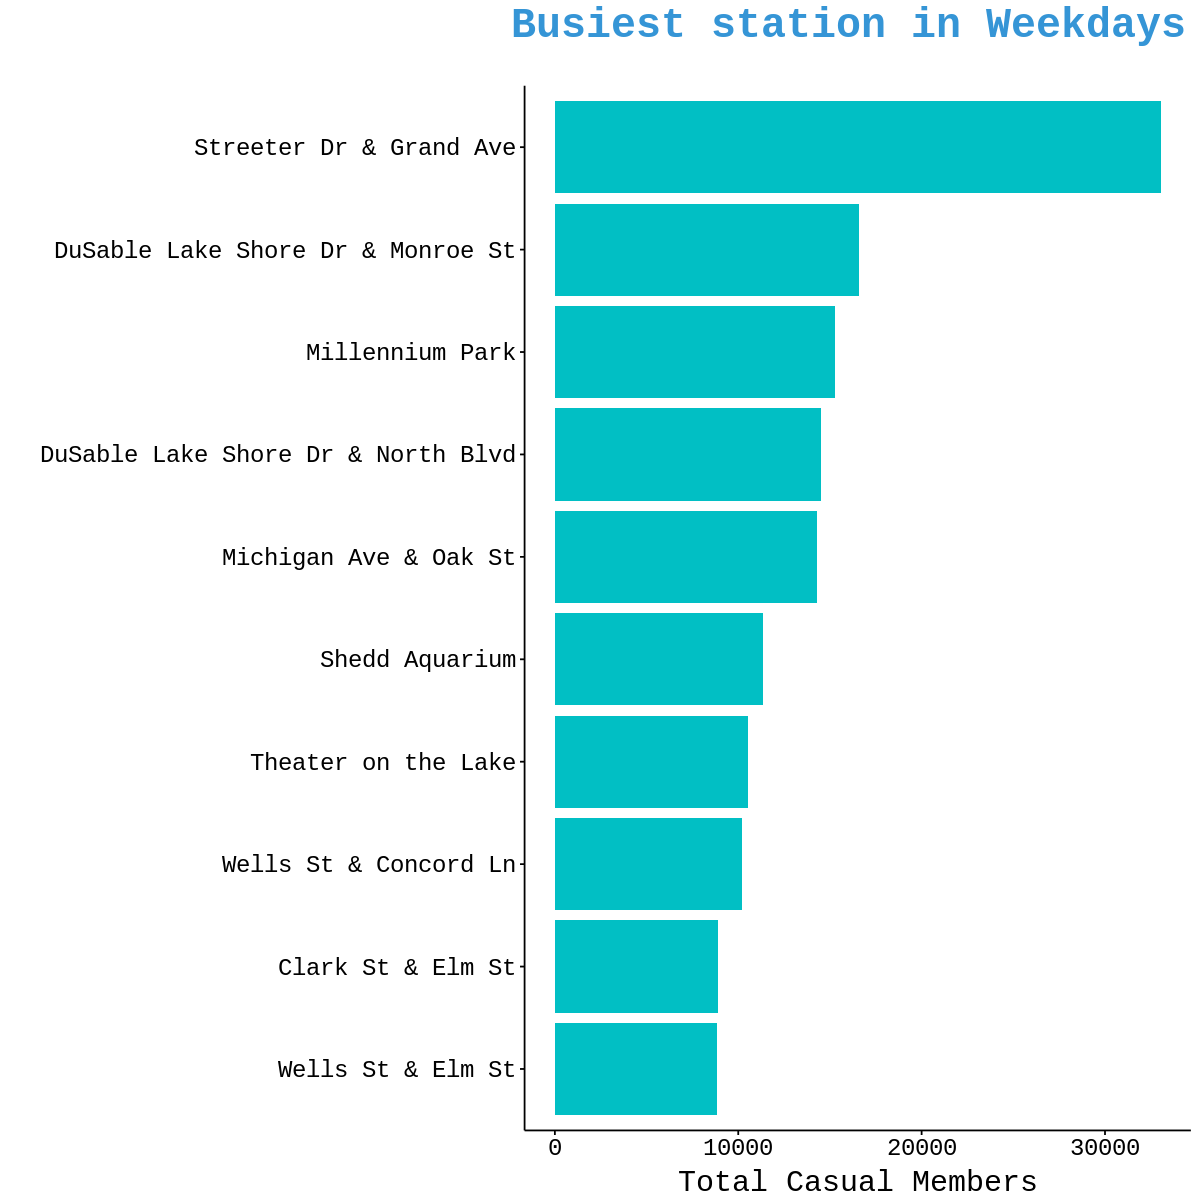

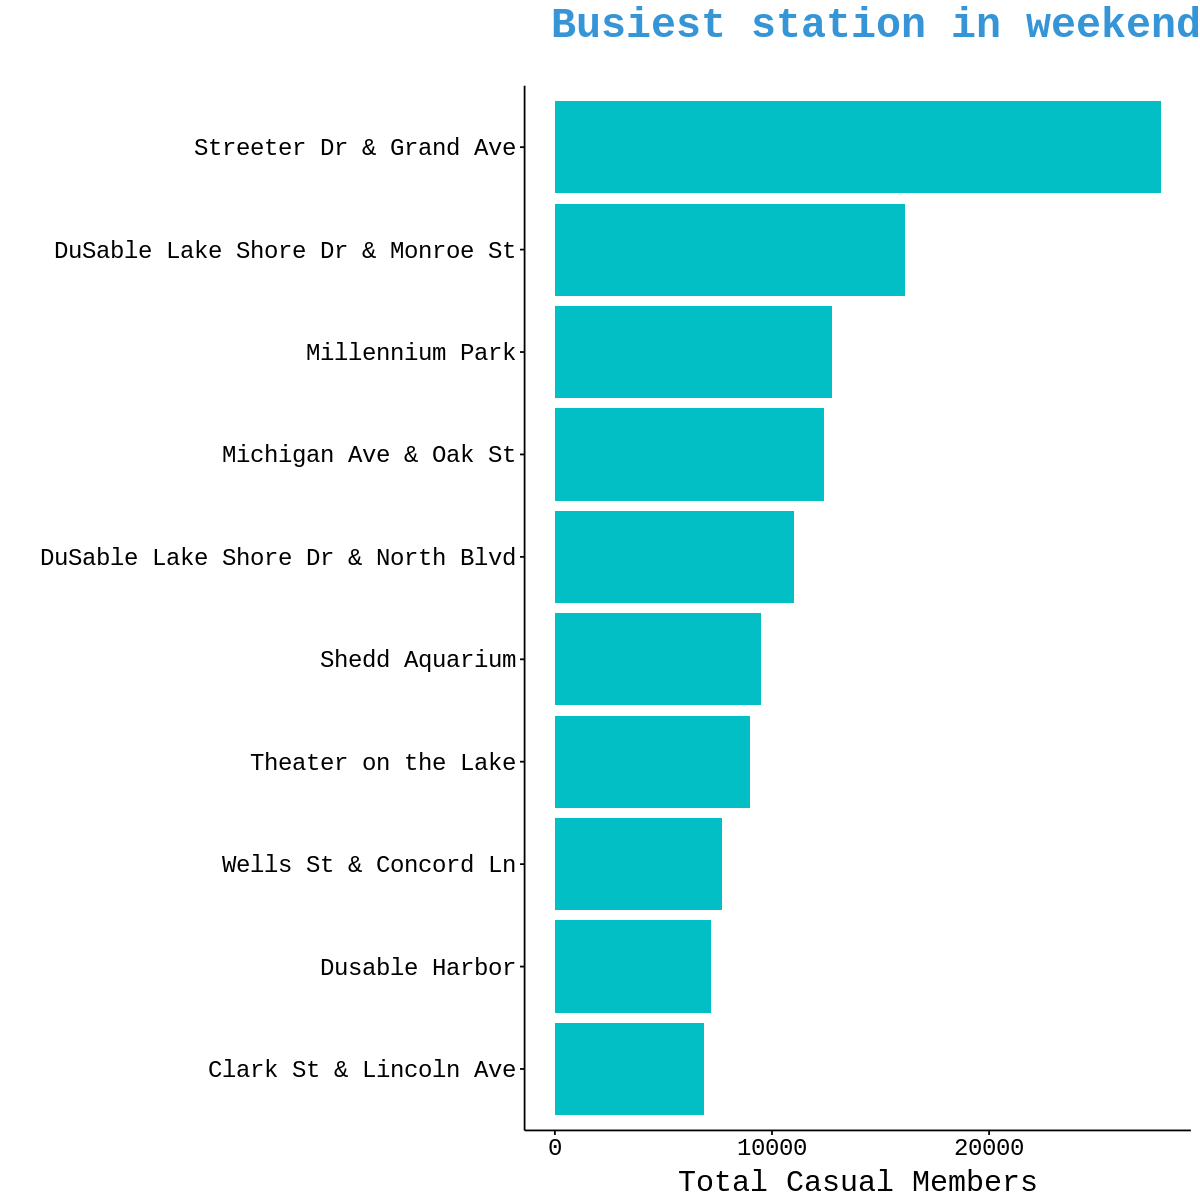

In [25]:
busiest_station_weekend <- divvy[(day_of_week=="Sat" | day_of_week=="Sun") & (!is.na(start_station_name)), 
      c(.N), 
      by=c("member_casual", "start_station_name")][
        member_casual=="Casual Members",c("start_station_name","V1")]
setorder(busiest_station_weekend, -V1)
busiest_station_weekend <- busiest_station_weekend[1:10]

busiest_station_weekday <- divvy[!(day_of_week=="Sat" | day_of_week=="Sun") & (!is.na(start_station_name)), 
      c(.N), 
      by=c("member_casual", "start_station_name")][
        member_casual=="Casual Members",c("start_station_name","V1")]
setorder(busiest_station_weekday, -V1)
busiest_station_weekday <- busiest_station_weekday[1:10]

library("forcats")
fig(10,10)
ggplot(data=busiest_station_weekday, aes(y=fct_reorder(start_station_name, V1), x=V1))+
  theme_tech(theme = "google")+
  scale_fill_tech(theme="X23andme")+
  theme(plot.title = element_text(face="bold",colour="#3595d6", hjust=1.6),
        plot.subtitle = element_text(colour="#3595d6", hjust=-2.45))+
  geom_col(fill="#01bfc4")+
  labs(x='Total Casual Members', y='', 
         title='Busiest station in Weekdays')

fig(10,10)
ggplot(data=busiest_station_weekend, aes(y=fct_reorder(start_station_name, V1), x=V1))+
  theme_tech(theme = "google")+
  scale_fill_tech(theme="X23andme")+
  theme(plot.title = element_text(face="bold",colour="#3595d6", hjust=1.6),
        plot.subtitle = element_text(colour="#3595d6", hjust=-2.45))+
  geom_col(fill="#01bfc4")+
  labs(x='Total Casual Members', y='', 
         title='Busiest station in weekend')


## **Conclusion:**
Data of ridership types:

1.   Riders tends to use the bikes for commuting. 
2.   Annual members have a more organized renting schedule.
3.   In weekend bikes is used to do leisure activities.

Potential Membership enticement strategy:

1.   Discount on other transport tickets to cater to commuters.
2.   Discount on favorite lunch venues.
3.   Discount on Weekends Leisure Venues.

Strategic partners target for cyclistic:

1.   Public transportation companies.
2.   Cafes and restaurants.
3.   Public Venues.
4.   Daytime entertainment estabishments.

Further research on casual member's preference of potentias strategic partners choice is adviseable to ensure a more targeted approach.




